# Exercise Set 6

## Mohaddeseh Mozaffari

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1D:

In [2]:
def find_peak_1d(data, dx):
    """find the peak of data in one dimention

    Args:
        data (1d_array): data
        dx (float): step size

    Returns:
        1d_array: peak position
    """
    N = len(data) #number of data
    peakpos = []  #index of peaks

    #check first point of data
    k1 = int((data[1]-data[2])/dx)
    if k1>0:
        peakpos.append(1)

    for i in range(1,N-1):
        k1 = int((data[i]-data[i-1])/dx)
        k2 = int((data[i]-data[i+1])/dx)

        if k1>0 and k2>0: #condition for peak
            peakpos.append(i)

    #check last point of data
    k2 = int((data[N-1]-data[N-2])/dx)
    if k2>0:
        peakpos.append(N-1)

    return peakpos

In [3]:
def UTPCF_1d(data, find_peak_1d, dx=0.1):
    """calculate un-weighted two point correlation function one dimention

    Args:
        data (1d_array): data
        find_peak_1d (function): find the peak of data
        dx (float, optional): step size of find peak. Defaults to 0.1.

    Returns:
        1d_array: un_weighted 2 point correlation function
    """
    peakpos = find_peak_1d(data, dx)
    N = len(data)
    npeak = len(peakpos)

    p = np.zeros(N)
    for i in range(npeak):
        for j in range(i+1, npeak):
            R = int((peakpos[i]-peakpos[j]))
            p[R] += 1

    psi = []
    for r in range(N):
        s = (p[r]/(npeak**2/(2*N)))-1
        psi.append(s)

    return psi

In [4]:
def genrate_peak_1d(N):
    """generate array with random peak in one dimention

    Args:
        N (int): size of random data

    Returns:
        1d_array: array with random peak
    """
    rand = np.zeros(N)
    for _ in range(N):
        x = np.random.randint(0,N-1)
        if rand[x-1] == 0 and rand[x+1] == 0:
            rand[x] = 1
    return rand

In [5]:
def UTPCF_1d_corrected(data, find_peak_1d, genrate_peak_1d, dx=0.1):
    """ calculate un-weighted two point correlation function corrected one dimention

    Args:
        data (1d_array): data
        find_peak_1d (function): find the peak of data
        generate_rand_1d (function): generate array with random peak
        dx (float, optional): step size of find peak. Defaults to 0.1.

    Returns:
        1d_array: un-weighted two point correlation function corrected
    """
    peakpos = find_peak_1d(data, dx)
    N = len(data)
    npeak = len(peakpos)

    p = np.zeros(N)
    for i in range(npeak):
        for j in range(i+1, npeak):
            R = int((peakpos[i]-peakpos[j]))
            p[R] += 1

    rand = genrate_peak_1d(N)
    peakpos_r = find_peak_1d(rand, dx)
    npeak_r = len(peakpos_r)

    p_r = np.zeros(N)
    for i in range(npeak_r):
        for j in range(i+1, npeak_r):
            R = int((peakpos_r[i]-peakpos_r[j]))
            p_r[R] += 1

    psi = []
    for r in range(N):
        if p_r[r] != 0:
            s = ( (p[r]/p_r[r]) * ((npeak_r * (npeak_r - 1))/(npeak * (npeak -1))) )-1
            psi.append(s)

    return psi

# 2D:

In [6]:
def find_peak_2d(data):
    """find the peak of data in two dimention

    Args:
        data (2d_array): data

    Returns:
        1d_array: peak position
    """
    N = len(data) #number of data
    peakpos = []  #index of peaks

    #check first point of data
    if data[0][0] > data[0][1] and data[0][0] > data[1][0]:
        peakpos.append(np.array([0,0]))

    for i in range(1, N - 1):
        for j in range(1, N - 1):
            if (data[i][j] > data[i - 1][j] and data[i][j] > data[i + 1][j] and
                 data[i][j] > data[i][j - 1] and data[i][j] > data[i][j + 1]):
                peakpos.append(np.array([i, j]))

    #check last point of data
    if data[N-1][N-1] > data[N-1][N-2] and data[N-1][N-1] > data[N-2][N-1]:
        peakpos.append(np.array([N-1, N-1]))


    return np.array(peakpos)

In [7]:
def UTPCF_2d(data, find_peak_2d):
    """calculate un-weighted two point correlation function two dimention

    Args:
        data (2d_array): data
        find_peak_2d (function): find the peak of data

    Returns:
        2d_array: un_weighted 2 point correlation function
    """
    peakpos = find_peak_2d(data)
    N = len(data)
    npeak = len(peakpos)
    nclass = int(N*2**0.5)
    
    p = np.zeros(nclass)
    
    for i in range(npeak):
        for j in range(i+1, npeak):
            R1 = int((peakpos[i,0]-peakpos[j,0]))
            R2 = int((peakpos[i,1]-peakpos[j,1]))
            R = int(np.sqrt((R1**2) + (R2**2)))
            p[R] += 1

    psi = []
    for r in range(N):
        s = (p[r]/(npeak**2/(2*N)))-1
        psi.append(s)

    return psi

In [8]:
def genrate_peak_2d(N):
    """generate array with random peak in two dimention

    Args:
        N (int): size of random data

    Returns:
        1d_array: array with random peak
    """
    rand = np.zeros((N,N))
    for _ in range(4*N):
        x,y = np.random.randint(0,N-1,2)

        if (rand[x-1,y] == 0 and rand[x+1,y] == 0 and rand[x,y+1] == 0 and 
            rand[x,y-1] == 0 and rand[x+1, y+1] == 0 and rand[x+1, y-1] == 0 and
            rand[x-1, y-1] == 0 and rand[x-1, y+1] == 0):
            rand[x,y] = 1
    return rand

In [9]:
def UTPCF_2d_corrected(data, find_peak_2d, genrate_peak_2d):
    """ calculate un-weighted two point correlation function corrected one dimention

    Args:
        data (2d_array): data
        find_peak_2d (function): find the peak of data
        generate_rand_2d (function): generate array with random peak
        dx (float, optional): step size of find peak. Defaults to 0.1.

    Returns:
        2d_array: un-weighted two point correlation function corrected
    """
    peakpos = find_peak_2d(data)
    N = len(data)
    npeak = len(peakpos)
    nclass = int(N*2**0.5)
    
    p = np.zeros(nclass)
    
    for i in range(npeak):
        for j in range(i+1, npeak):
            R1 = int((peakpos[i,0]-peakpos[j,0]))
            R2 = int((peakpos[i,1]-peakpos[j,1]))
            R = int(np.sqrt((R1**2) + (R2**2)))
            p[R] += 1
    
    rand = genrate_peak_2d(N)
    
    peakpos_r = find_peak_2d(rand)
    npeak_r = len(peakpos_r)
    
    p_r = np.zeros(nclass)
    
    for i in range(npeak_r):
        for j in range(i+1, npeak_r):
            R1 = int((peakpos_r[i,0]-peakpos_r[j,0]))
            R2 = int((peakpos_r[i,1]-peakpos_r[j,1]))
            R = int(np.sqrt((R1**2) + (R2**2)))
            p_r[R] += 1


    psi = []
    for r in range(N):
        if p_r[r] != 0:
            s = ( (p[r]/p_r[r]) * ((npeak_r * (npeak_r - 1))/(npeak * (npeak -1))) )-1
            psi.append(s)

    return psi

# A:

In [10]:
data1 = np.loadtxt("1d_data.txt")

In [11]:
psi = UTPCF_1d(data1, find_peak_1d)

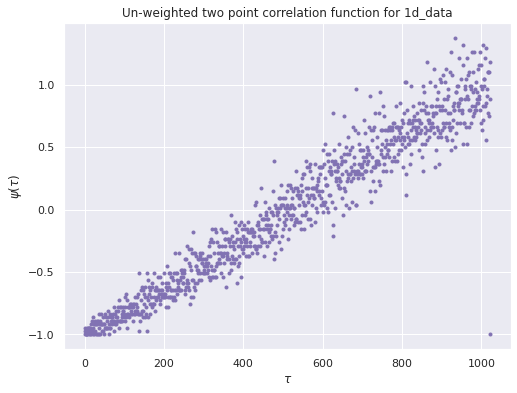

In [12]:
plt.figure(figsize=(8,6))
plt.plot(psi, "m.")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\psi(\tau)$")
plt.title("Un-weighted two point correlation function for 1d_data")
plt.show()

In [13]:
psi_corrected = UTPCF_1d_corrected(data1, find_peak_1d, genrate_peak_1d)

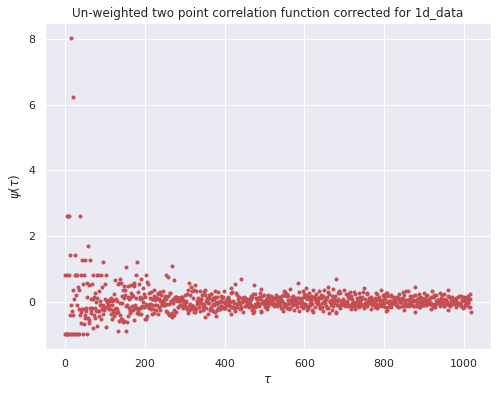

In [14]:
plt.figure(figsize=(8,6))
plt.plot(psi_corrected, "r.")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\psi(\tau)$")

plt.title("Un-weighted two point correlation function corrected for 1d_data")
plt.show()

# B:

## part 1:

In [15]:
data2 = np.loadtxt("2d_data.txt")

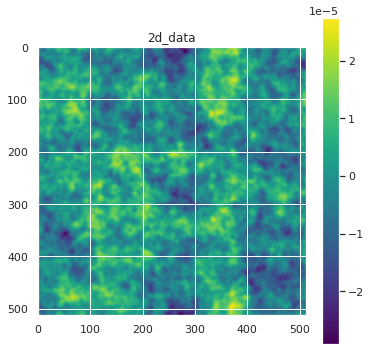

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(data2, cmap="viridis")
plt.title("2d_data")
plt.colorbar()
plt.show()

In [17]:
psi2 = UTPCF_2d(data2, find_peak_2d)

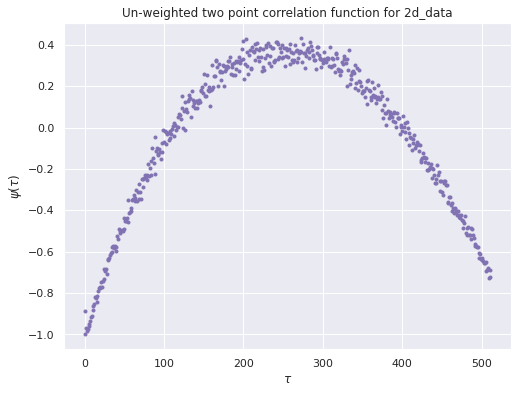

In [18]:
plt.figure(figsize=(8,6))
plt.plot(psi2, "m.")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\psi(\tau)$")
plt.title("Un-weighted two point correlation function for 2d_data")
plt.show()

In [19]:
psi2_corrected = UTPCF_2d_corrected(data2, find_peak_2d, genrate_peak_2d)

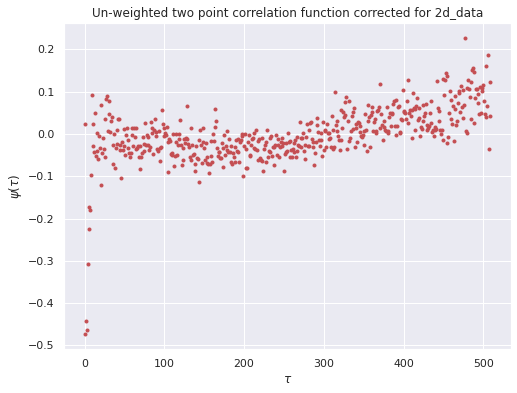

In [20]:
plt.figure(figsize=(8,6))
plt.plot(psi2_corrected, "r.")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\psi(\tau)$")
plt.title("Un-weighted two point correlation function corrected for 2d_data")
plt.show()

## part 2:

In [21]:
data3 = np.loadtxt("2d_datab.txt")

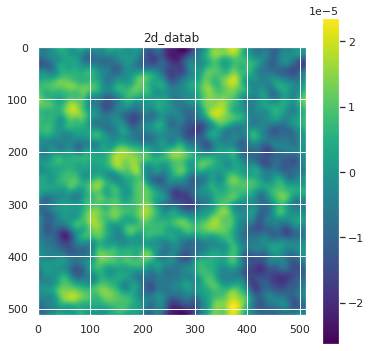

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(data3, cmap="viridis")
plt.title("2d_datab")
plt.colorbar()
plt.show()

In [23]:
psi3 = UTPCF_2d(data3, find_peak_2d)

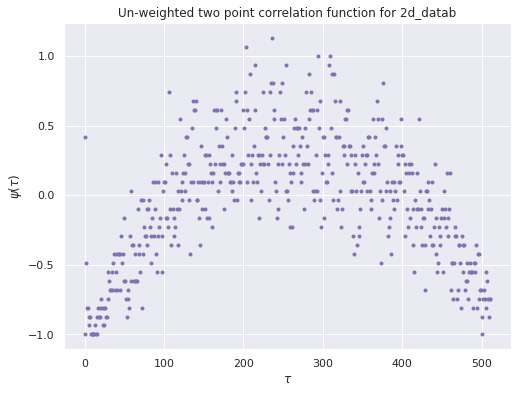

In [24]:
plt.figure(figsize=(8,6))
plt.plot(psi3, "m.")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\psi(\tau)$")
plt.title("Un-weighted two point correlation function for 2d_datab")
plt.show()

In [25]:
psi3_corrected = UTPCF_2d_corrected(data3, find_peak_2d, genrate_peak_2d)

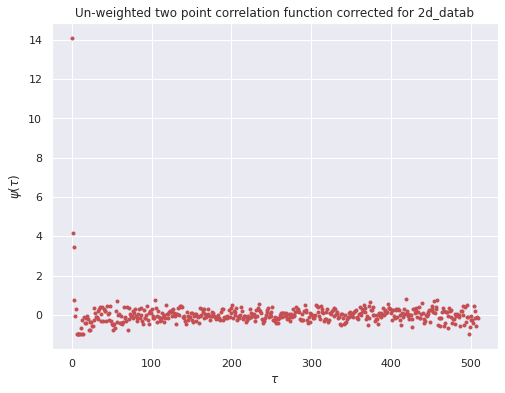

In [26]:
plt.figure(figsize=(8,6))
plt.plot(psi3_corrected, "r.")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\psi(\tau)$")
plt.title("Un-weighted two point correlation function corrected for 2d_datab")
plt.show()